In [70]:
import pandas as pd
import numpy as np
import matplotlib as mt
import sklearn as sk
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [29]:

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.target[[10, 50, 85]]
cancer = load_breast_cancer()

In [31]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [36]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.33, random_state=42)

In [37]:
X_train


array([[1.546e+01, 1.189e+01, 1.025e+02, ..., 1.827e-01, 3.216e-01,
        1.010e-01],
       [1.285e+01, 2.137e+01, 8.263e+01, ..., 5.601e-02, 2.488e-01,
        8.151e-02],
       [1.921e+01, 1.857e+01, 1.255e+02, ..., 2.091e-01, 3.537e-01,
        8.294e-02],
       ...,
       [1.429e+01, 1.682e+01, 9.030e+01, ..., 3.333e-02, 2.458e-01,
        6.120e-02],
       [1.398e+01, 1.962e+01, 9.112e+01, ..., 1.827e-01, 3.179e-01,
        1.055e-01],
       [1.218e+01, 2.052e+01, 7.722e+01, ..., 7.431e-02, 2.694e-01,
        6.878e-02]])

In [39]:
y_train

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [61]:
np.average(X_train)

62.320852315415564

In [62]:
X_train = X_train- 0.6194225721784777

In [65]:
X_train.size

11430

In [71]:
y_train.size

381

In [ ]:
y_train= y_train.size

In [76]:
tree = DecisionTreeRegressor(criterion='mse').fit(X_train.reshape(381,30), y_train)

In [77]:
tree = DecisionTreeRegressor().fit(X_train.reshape(381,30), y_train)

In [80]:
knnreg = KNeighborsRegressor(n_neighbors=3, p=2)
knn = knnreg.fit(X_train.reshape(-1,1), y_train)

ValueError: Found input variables with inconsistent numbers of samples: [11430, 381]

ValueError: x and y must be the same size

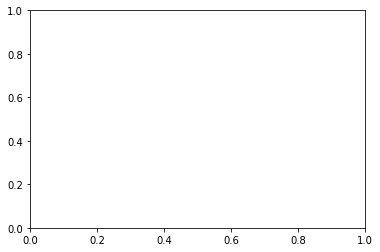

In [82]:
plt.scatter(X_train.reshape(381,30), y_train.reshape(381,1) , marker='o', color='r', label='observations')